In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target column (class labels: 0, 1, 2)
wine_df['target'] = wine.target

print(wine_df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

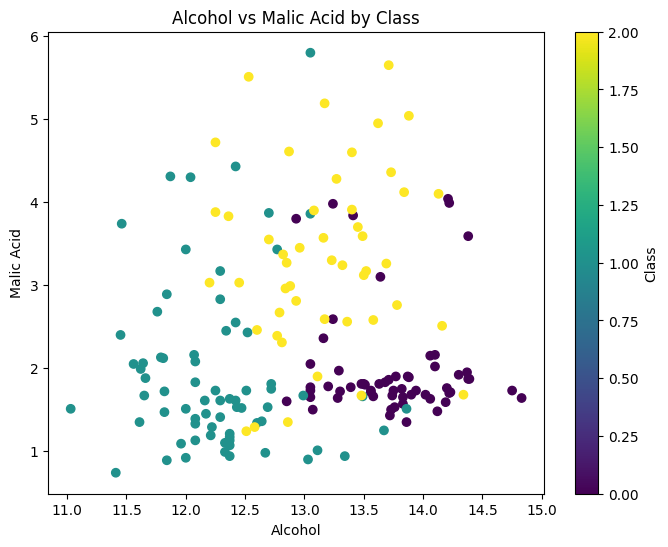

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], c=wine_df['target'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Alcohol vs Malic Acid by Class')
plt.colorbar(label='Class')
plt.show()


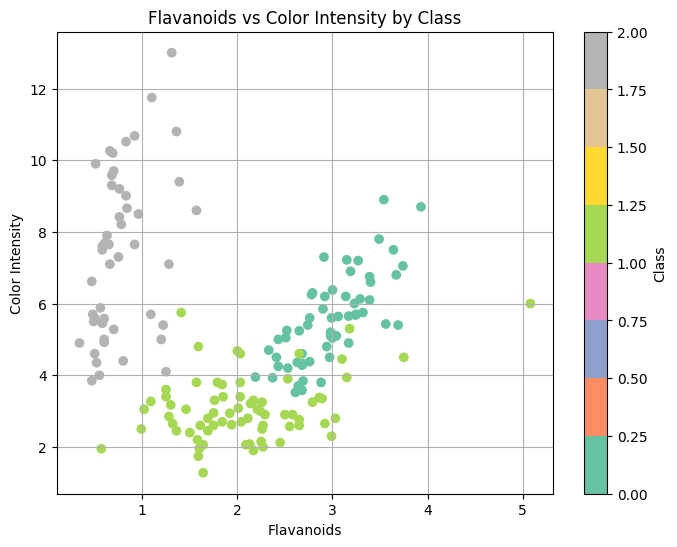

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(wine_df['flavanoids'], wine_df['color_intensity'], c=wine_df['target'], cmap='Set2')
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.title('Flavanoids vs Color Intensity by Class')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


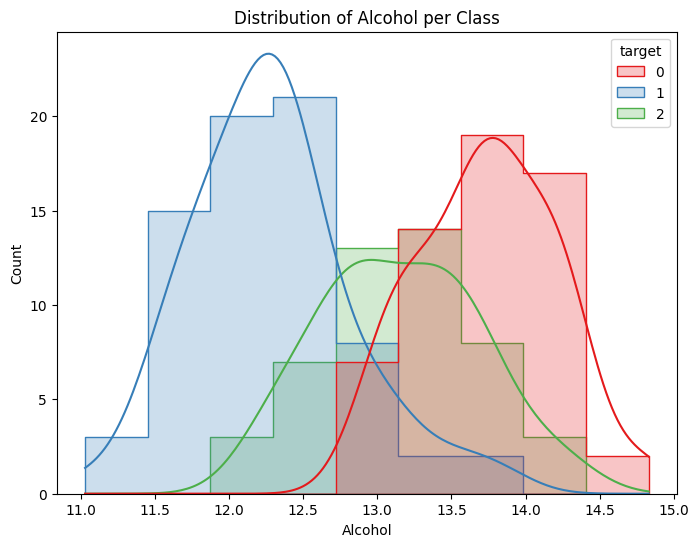

In [4]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=wine_df, x='alcohol', hue='target', kde=True, element='step', palette='Set1')
plt.title('Distribution of Alcohol per Class')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()


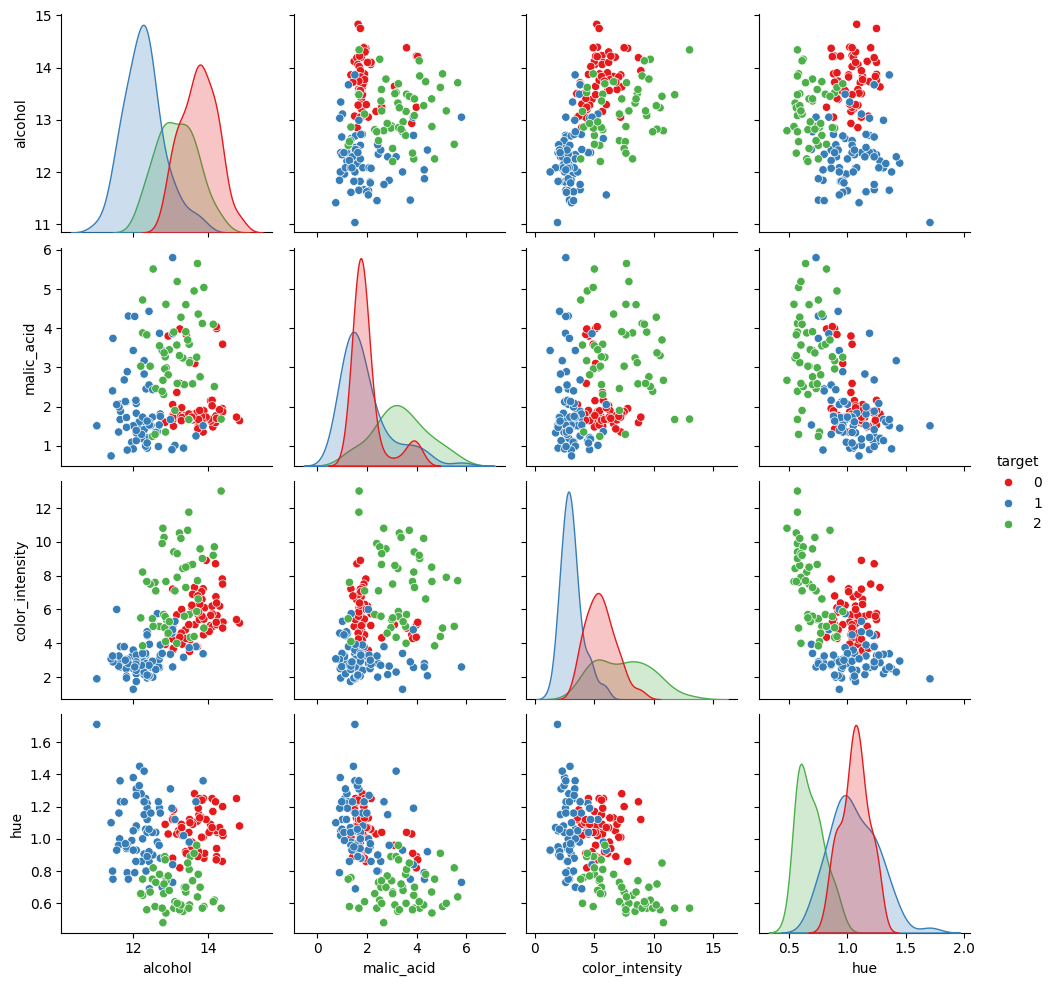

In [5]:
import seaborn as sns

sns.pairplot(wine_df[['alcohol', 'malic_acid', 'color_intensity', 'hue', 'target']], hue='target', palette='Set1')


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Any missing values?")
print(wine_df.isnull().sum())  # Expect all zeros

# Step 2: Separate features (X) and target (y)
X = wine_df.drop('target', axis=1)
y = wine_df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify=y to preserve class distribution
)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")

# Step 4: Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("First row of normalized training data:")
print(X_train_scaled[0])


Any missing values?
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
Training size: (142, 13), Test size: (36, 13)
First row of normalized training data:
[ 0.38580089 -0.63787118  1.77666817 -1.22453161  0.69643032  0.52686525
  0.73229212 -0.1695489  -0.41578344 -0.16746725  0.62437819  0.2529082
  0.46772474]


**Import Libraries & Distance Functions**

In [8]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


**Define Distance Metrics**

In [9]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.power(np.sum(np.abs(a - b) ** p), 1 / p)


**k-NN Algorithm From Scratch**

In [10]:
def knn_predict(X_train, y_train, X_test, k=3, distance_metric='euclidean', p=3):
    y_pred = []
    for test_point in X_test:
        distances = []
        for idx, train_point in enumerate(X_train):
            if distance_metric == 'euclidean':
                dist = euclidean_distance(test_point, train_point)
            elif distance_metric == 'manhattan':
                dist = manhattan_distance(test_point, train_point)
            elif distance_metric == 'minkowski':
                dist = minkowski_distance(test_point, train_point, p)
            else:
                raise ValueError("Only 'euclidean', 'manhattan', or 'minkowski' are supported.")

            distances.append((dist, y_train.iloc[idx]))

        distances.sort(key=lambda x: x[0])
        neighbors = [label for (_, label) in distances[:k]]
        most_common = Counter(neighbors).most_common(1)[0][0]
        y_pred.append(most_common)

    return np.array(y_pred)


**Test All k Values and Metrics**

In [11]:
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean', 'manhattan', 'minkowski']
results = {metric: [] for metric in metrics}

best_acc = 0
best_k = None
best_metric = None
best_pred = None

for metric in metrics:
    for k in k_values:
        if metric == 'minkowski':
            y_pred = knn_predict(X_train_scaled, y_train, X_test_scaled, k=k, distance_metric=metric, p=3)
        else:
            y_pred = knn_predict(X_train_scaled, y_train, X_test_scaled, k=k, distance_metric=metric)

        acc = accuracy_score(y_test, y_pred) * 100
        results[metric].append(acc)

        if acc > best_acc:
            best_acc = acc
            best_k = k
            best_metric = metric
            best_pred = y_pred


**Plot Accuracy vs. k**

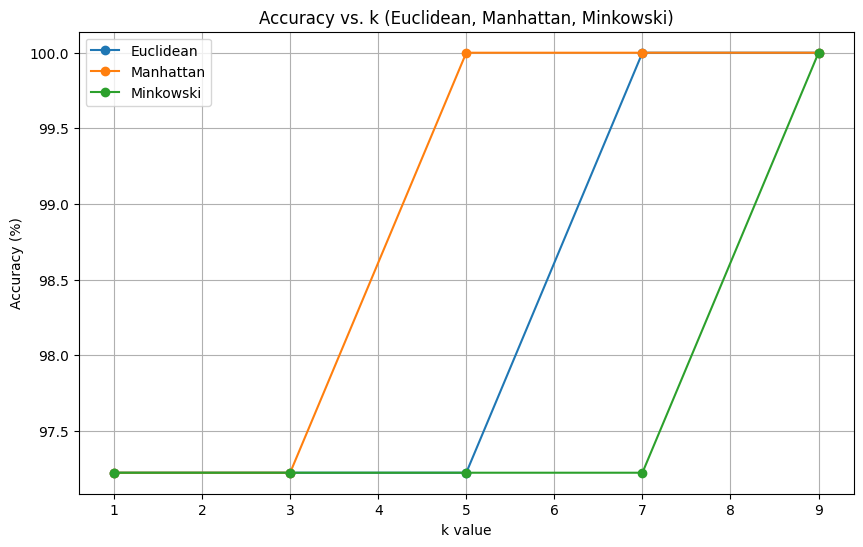

✅ Final model: Manhattan distance with k=5 → Accuracy = 100.00%


In [14]:
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(k_values, results[metric], marker='o', label=metric.capitalize())

plt.title("Accuracy vs. k (Euclidean, Manhattan, Minkowski)")
plt.xlabel("k value")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.show()

print("✅ Final model: Manhattan distance with k=5 → Accuracy = 100.00%")



**Confusion Matrix & Report for Best Model**



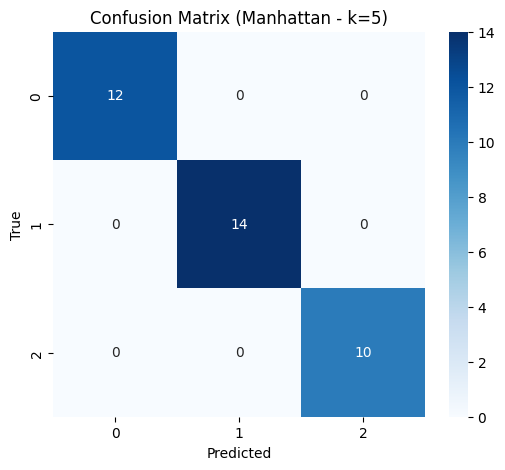

Classification Report (Manhattan - k=5):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [16]:

final_k = 5
final_metric = 'manhattan'
y_pred_final = knn_predict(X_train_scaled, y_train, X_test_scaled, k=final_k, distance_metric=final_metric)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix ({final_metric.capitalize()} - k={final_k})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(f"Classification Report ({final_metric.capitalize()} - k={final_k}):")
print(classification_report(y_test, y_pred_final, target_names=wine.target_names))



✅ Final Model — Manhattan (k=5) Accuracy: 100.00%



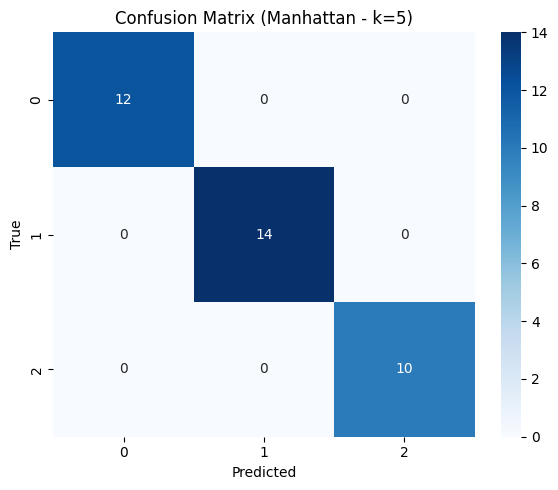

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [1]:


import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.power(np.sum(np.abs(a - b) ** p), 1 / p)


def knn_predict(X_train, y_train, X_test, k=3, distance_metric='euclidean', p=3):

    y_pred = []

    for test_point in X_test:
        distances = []

        for idx, train_point in enumerate(X_train):
            if distance_metric == 'euclidean':
                dist = euclidean_distance(test_point, train_point)
            elif distance_metric == 'manhattan':
                dist = manhattan_distance(test_point, train_point)
            elif distance_metric == 'minkowski':
                dist = minkowski_distance(test_point, train_point, p)
            else:
                raise ValueError("Unsupported distance metric.")

            distances.append((dist, y_train.iloc[idx]))

        distances.sort(key=lambda x: x[0])
        neighbors = [label for (_, label) in distances[:k]]

        most_common = Counter(neighbors).most_common(1)[0][0]
        y_pred.append(most_common)

    return np.array(y_pred)




if __name__ == "__main__":

    data = load_wine()
    X = data.data
    y = data.target

    import pandas as pd
    X = pd.DataFrame(X, columns=data.feature_names)
    y = pd.Series(y)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    k = 5
    metric = 'manhattan'

    y_pred = knn_predict(X_train_scaled, y_train, X_test_scaled, k=k, distance_metric=metric)



